In [2]:
import pandas as pd

In [3]:
filename = 'https://github.com/lmassaron/datasets/'
filename += 'releases/download/1.0/tennis.feather'
tennis = pd.read_feather(filename)

In [4]:
tennis.head

<bound method NDFrame.head of      outlook temperature humidity    wind  play
0      Sunny         Hot     High    Weak     0
1      Sunny         Hot     High  Strong     0
2      Sunny        Mild     High    Weak     0
3      Sunny        Mild   Normal  Strong     1
4      Sunny        Cool   Normal    Weak     1
5   Overcast         Hot     High    Weak     1
6   Overcast         Hot   Normal    Weak     1
7   Overcast        Mild     High  Strong     1
8   Overcast        Cool   Normal  Strong     1
9       Rain        Mild     High    Weak     1
10      Rain        Mild     High  Strong     0
11      Rain        Mild   Normal    Weak     1
12      Rain        Cool   Normal    Weak     1
13      Rain        Cool   Normal  Strong     0>

In [5]:
X = tennis[['outlook', 'temperature', 'humidity', 'wind']]
X = pd.get_dummies(X)
y = tennis.play

In [6]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X, y)

DecisionTreeClassifier()

C:\Users\shafeek\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


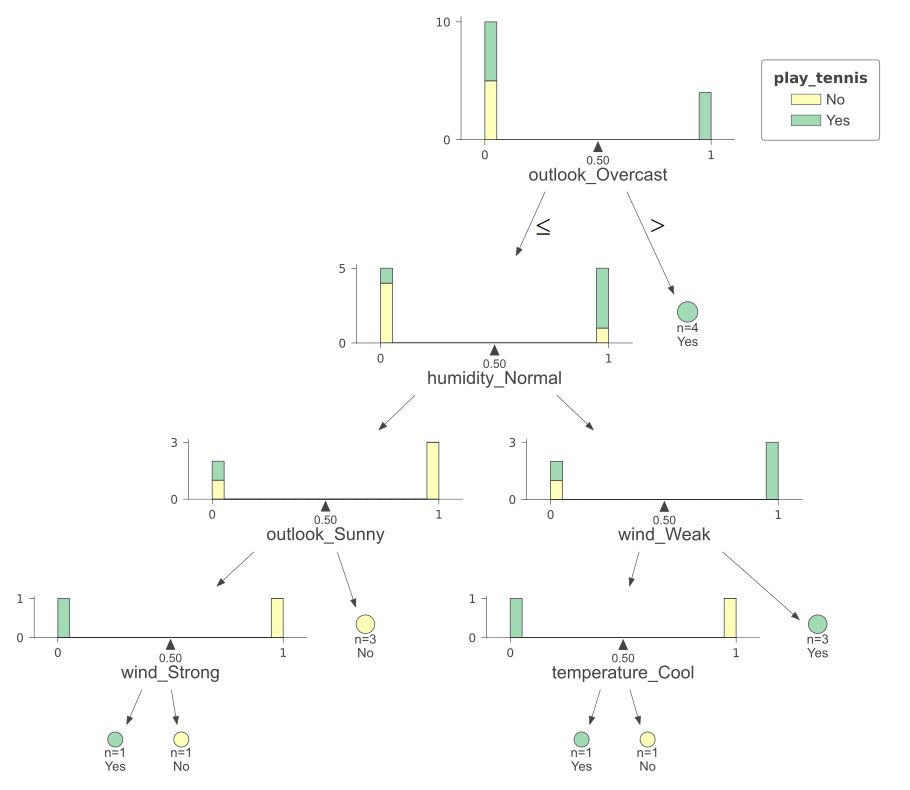

In [7]:
from dtreeviz.trees import dtreeviz
viz = dtreeviz(dt, X, y, 
              target_name='play_tennis',
              feature_names=X.columns,
              class_names=["No", "Yes"],
              scale=2.0)
viz

In [8]:
filename = 'https://github.com/lmassaron/datasets/'
filename += 'releases/download/1.0/titanic.feather'
titanic = pd.read_feather(filename)
from sklearn.model_selection import train_test_split

X = titanic.iloc[:, :-1]
y = titanic.iloc[:, -1]

(X_train, X_test,
y_train, y_test) = train_test_split(X, y,
                                   random_state=0, shuffle=True)

In [9]:
dt = DecisionTreeClassifier(min_samples_split=5)
dt.fit(X_train, y_train)
accuracy = dt.score(X_test, y_test)

print(f"test accuracy: {accuracy:0.3}")

test accuracy: 0.777


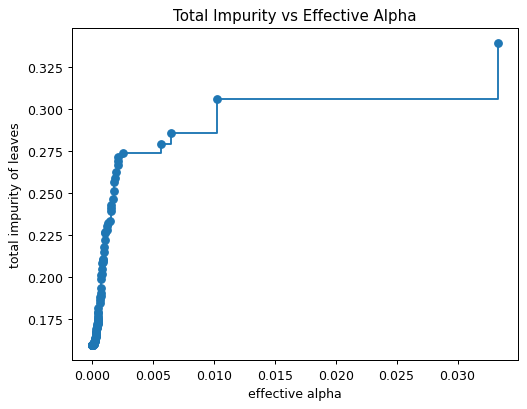

In [10]:
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=90)
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o',
       drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs Effective Alpha")
plt.show()

In [11]:
best_pruning = list()
for ccp_alpha in ccp_alphas:
    if ccp_alpha > 0:
        dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
        dt.fit(X_train, y_train)
        best_pruning.append([ccp_alpha, dt.score(X_test, y_test)])
best_pruning = sorted(best_pruning, key=lambda x:x[1], reverse=True)

best_ccp_alpha = best_pruning[0][0]
dt = DecisionTreeClassifier(random_state=0, ccp_alpha=best_ccp_alpha)
dt.fit(X_train, y_train)
accuracy = dt.score(X_test, y_test)

print(f"test accuracy: {accuracy:0.3}")

print("Number of nodes in the last tree is {} with ccp_alpha: {:0.3}"
     .format(dt.tree_.node_count, best_ccp_alpha))

test accuracy: 0.805
Number of nodes in the last tree is 13 with ccp_alpha: 0.0025


C:\Users\shafeek\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


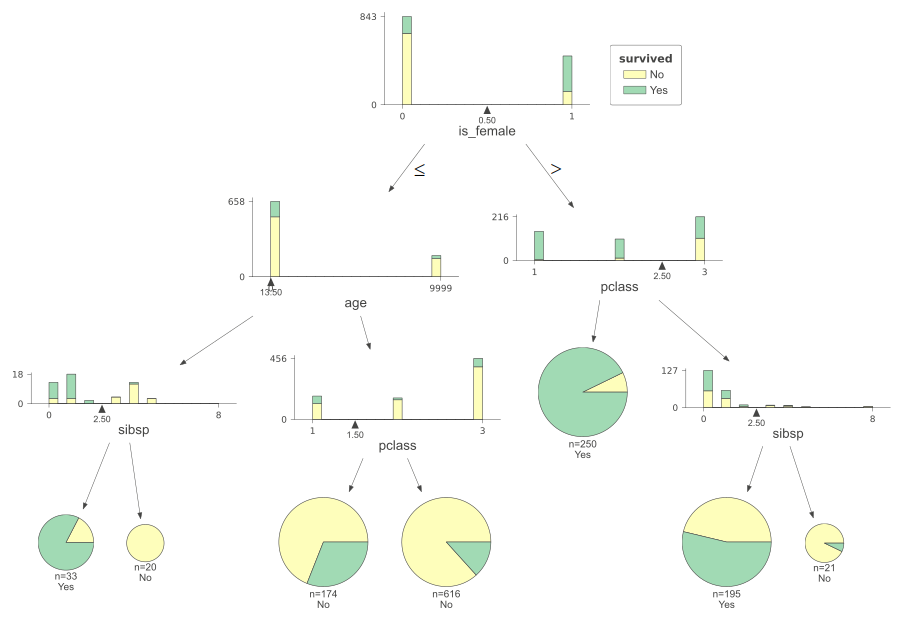

In [14]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(dt, X, y,
              target_name='survived',
              feature_names=X.columns,
              class_names=["No", "Yes"],
              scale=1.5)
viz